In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D3-Pamela/S4/Office_Pamela-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (7896, 24, 1)
y_train.shape =  (7896,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [27]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")

In [28]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
62/62 [==============================] - 11s 47ms/step - loss: 7.4569
Epoch 2/300
62/62 [==============================] - 3s 41ms/step - loss: 7.2007
Epoch 3/300
62/62 [==============================] - 3s 44ms/step - loss: 7.1640
Epoch 4/300
62/62 [==============================] - 2s 28ms/step - loss: 7.0802
Epoch 5/300
62/62 [==============================] - 1s 21ms/step - loss: 7.3105
Epoch 6/300
62/62 [==============================] - 1s 21ms/step - loss: 7.3032
Epoch 7/300
62/62 [==============================] - 1s 20ms/step - loss: 7.2640
Epoch 8/300
62/62 [==============================] - 1s 21ms/step - loss: 7.4271
Epoch 9/300
62/62 [==============================] - 1s 20ms/step - loss: 7.2124
Epoch 10/300
62/62 [==============================] - 1s 20ms/step - loss: 7.2472
Epoch 11/300
62/62 [==============================] - 1s 20ms/step - loss: 7.2407
Epoch 12/300
62/62 [==============================] - 1s 20ms/step - loss: 7.2696
Epoch 13/300
62/62 [====

In [29]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [31]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 3.2287176014931176
RMSE for BiLSTM Model for testing is: 3.3800394352797247
MAE for BiLSTM Model for training is: 2.409926130442452
MAE for BiLSTM Model for testing is: 2.5204161074975446
MAPE for BiLSTM Model for training is: 0.09655105643013205
MAPE for BiLSTM Model for testing is: 0.10330584551594217


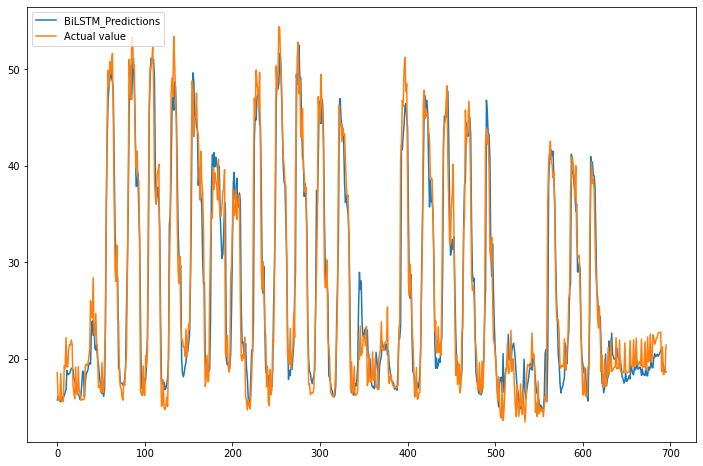

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [19]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([18.61666667]), array([15.760734], dtype=float32))

In [20]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([2.85593307]), array([-0.36763382]), array([0.01949978]), array([0.08735784]), array([2.92054749]), array([-0.42563846]), array([-0.08196933]), array([-0.46883939]), array([3.12320989]), array([2.44177793]), array([5.39902064]), array([0.34421412]), array([0.84952126]), array([2.50041936]), array([3.00862846]), array([2.68267529]), array([2.97157046]), array([2.43730202]), array([-1.6215416]), array([-1.52366117]), array([-1.8314874]), array([1.83115628]), array([-0.40269356]), array([-0.15067012]), array([2.86608251]), array([0.42728577]), array([0.81462848]), array([-0.48627294]), array([-1.61265373]), array([-2.86956799]), array([-2.91848704]), array([-0.1968764]), array([1.68792966]), array([1.08744786]), array([0.63146083]), array([0.57809563]), array([0.70121625]), array([1.4358298]), array([6.5781943]), array([1.62436969]), array([0.29628754]), array([5.95864169]), array([-0.85725848]), array([1.30860176]), array([3.77923329]), array([-0.00963809]), array([0.9035043]), ar

In [21]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([17.34206988]), array([-14.93453827]))

In [22]:
max(d1)-min(d1)

array([32.27660815])

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(350, 346)